In [1]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
# Now you can import the TimeSeriesDataset class
from TimeSeriesDataset import TimeSeriesDataset as TSD

In [2]:
# initialize dataset by downloading dataset or downloading the data from polity_url
dataset = TSD(categories=['sc'], template_path="/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv")
# initialize the time array
dataset.initialize_dataset_grid(-10000,2000,100)

Loaded template from /Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv
Downloaded 839 rows


In [3]:
dataset.download_all_categories()
dataset.save_dataset(path = '../datasets', name = '100_yr_dataset')

Dataset saved to ../datasets/100_yr_dataset.xlsx


In [4]:
# import dataset
dataset.load_dataset(path = "../datasets", name = '100_yr_dataset')
# remove all rows that have less than 30% of the columns filled in
dataset.remove_incomplete_rows(nan_threshold=0.3)
# build the social complexity variables
dataset.build_social_complexity()


Dataset loaded from ../datasets/100_yr_dataset.xlsx


In [5]:
dataset.scv

,NGA,PolityID,PolityName,Year,Pop,Terr,Cap,Hierarchy,Government,Infrastructure,Information,Money
0,Southern Mesopotamia,132,iq_abbasid_cal_1,800,6.963930,6.919078,5.845098,5.000000,0.636364,1.000000,0.866667,5.0
1,Southern Mesopotamia,132,iq_abbasid_cal_1,900,6.963930,6.000000,5.954243,5.000000,0.636364,1.000000,0.866667,5.0
2,Southern Mesopotamia,484,iq_abbasid_cal_2,1200,6.591065,5.875061,6.000000,4.079566,0.636364,0.416667,0.666667,5.0
3,Susiana,107,ir_achaemenid_emp,-500,7.408219,6.687159,5.301030,5.707332,0.909091,0.916667,0.933333,5.0
4,Susiana,107,ir_achaemenid_emp,-400,7.528868,6.585392,5.301030,5.707332,0.909091,0.916667,0.933333,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1730,NaN,668,ni_nri_k,1500,NaN,NaN,NaN,1.500000,0.181818,0.166667,0.000000,5.0
1731,NaN,668,ni_nri_k,1600,NaN,NaN,NaN,1.500000,0.181818,0.166667,0.000000,5.0
1732,NaN,668,ni_nri_k,1700,NaN,NaN,NaN,1.500000,0.181818,0.166667,0.000000,5.0
1733,NaN,668,ni_nri_k,1800,NaN,NaN,NaN,1.500000,0.181818,0.166667,0.000000,5.0


In [6]:
# impute missing data
dataset.impute_missing_values()

In [7]:
dataset.save_dataset(path = '../datasets', name = '100_yr_dataset')

Dataset saved to ../datasets/100_yr_dataset.xlsx


In [8]:
sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']

dataset.compute_PCA(sc_columns, 'PC', n_cols = 2, n_PCA = 8)

Explained variance by each PC:
PC1: 78.32%
PC2: 5.21%
PC3: 4.39%
PC4: 4.19%
PC5: 3.34%
PC6: 2.13%
PC7: 1.53%
PC8: 0.90%


In [9]:
dataset.scv_clean

,NGA,PolityID,PolityName,Year,Pop,Terr,Cap,Hierarchy,Government,Infrastructure,Information,Money,PC_1,PC_2
0,Southern Mesopotamia,132,iq_abbasid_cal_1,800,6.963930,6.919078,5.845098,5.000000,0.636364,1.000000,0.866667,5.0,5.565499,-0.458643
1,Southern Mesopotamia,132,iq_abbasid_cal_1,900,6.963930,6.000000,5.954243,5.000000,0.636364,1.000000,0.866667,5.0,5.368681,-0.488205
2,Southern Mesopotamia,484,iq_abbasid_cal_2,1200,6.591065,5.875061,6.000000,4.079566,0.636364,0.416667,0.666667,5.0,4.030666,-0.360698
3,Susiana,107,ir_achaemenid_emp,-500,7.408219,6.687159,5.301030,5.707332,0.909091,0.916667,0.933333,5.0,5.914133,-0.495064
4,Susiana,107,ir_achaemenid_emp,-400,7.528868,6.585392,5.301030,5.707332,0.909091,0.916667,0.933333,5.0,5.923509,-0.497172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,Orkhon Valley,272,mn_hunnu_emp,-200,6.176091,6.603197,3.613272,3.020073,0.090909,0.000000,0.000000,0.0,-0.067199,1.212819
1693,Orkhon Valley,272,mn_hunnu_emp,-100,6.176091,6.603197,3.613272,3.020073,0.090909,0.000000,0.000000,0.0,-0.067199,1.212819
1722,Galilee,105,il_yisrael,-1000,4.690229,3.970240,4.278820,4.500000,0.363636,0.500000,0.400000,3.0,1.451665,0.180434
1723,Galilee,105,il_yisrael,-900,5.439478,3.970240,4.278820,4.500000,0.363636,0.500000,0.400000,3.0,1.672739,0.204194


In [10]:
dataset.save_dataset(path = '../datasets', name = '100_yr_dataset')

Dataset saved to ../datasets/100_yr_dataset.xlsx


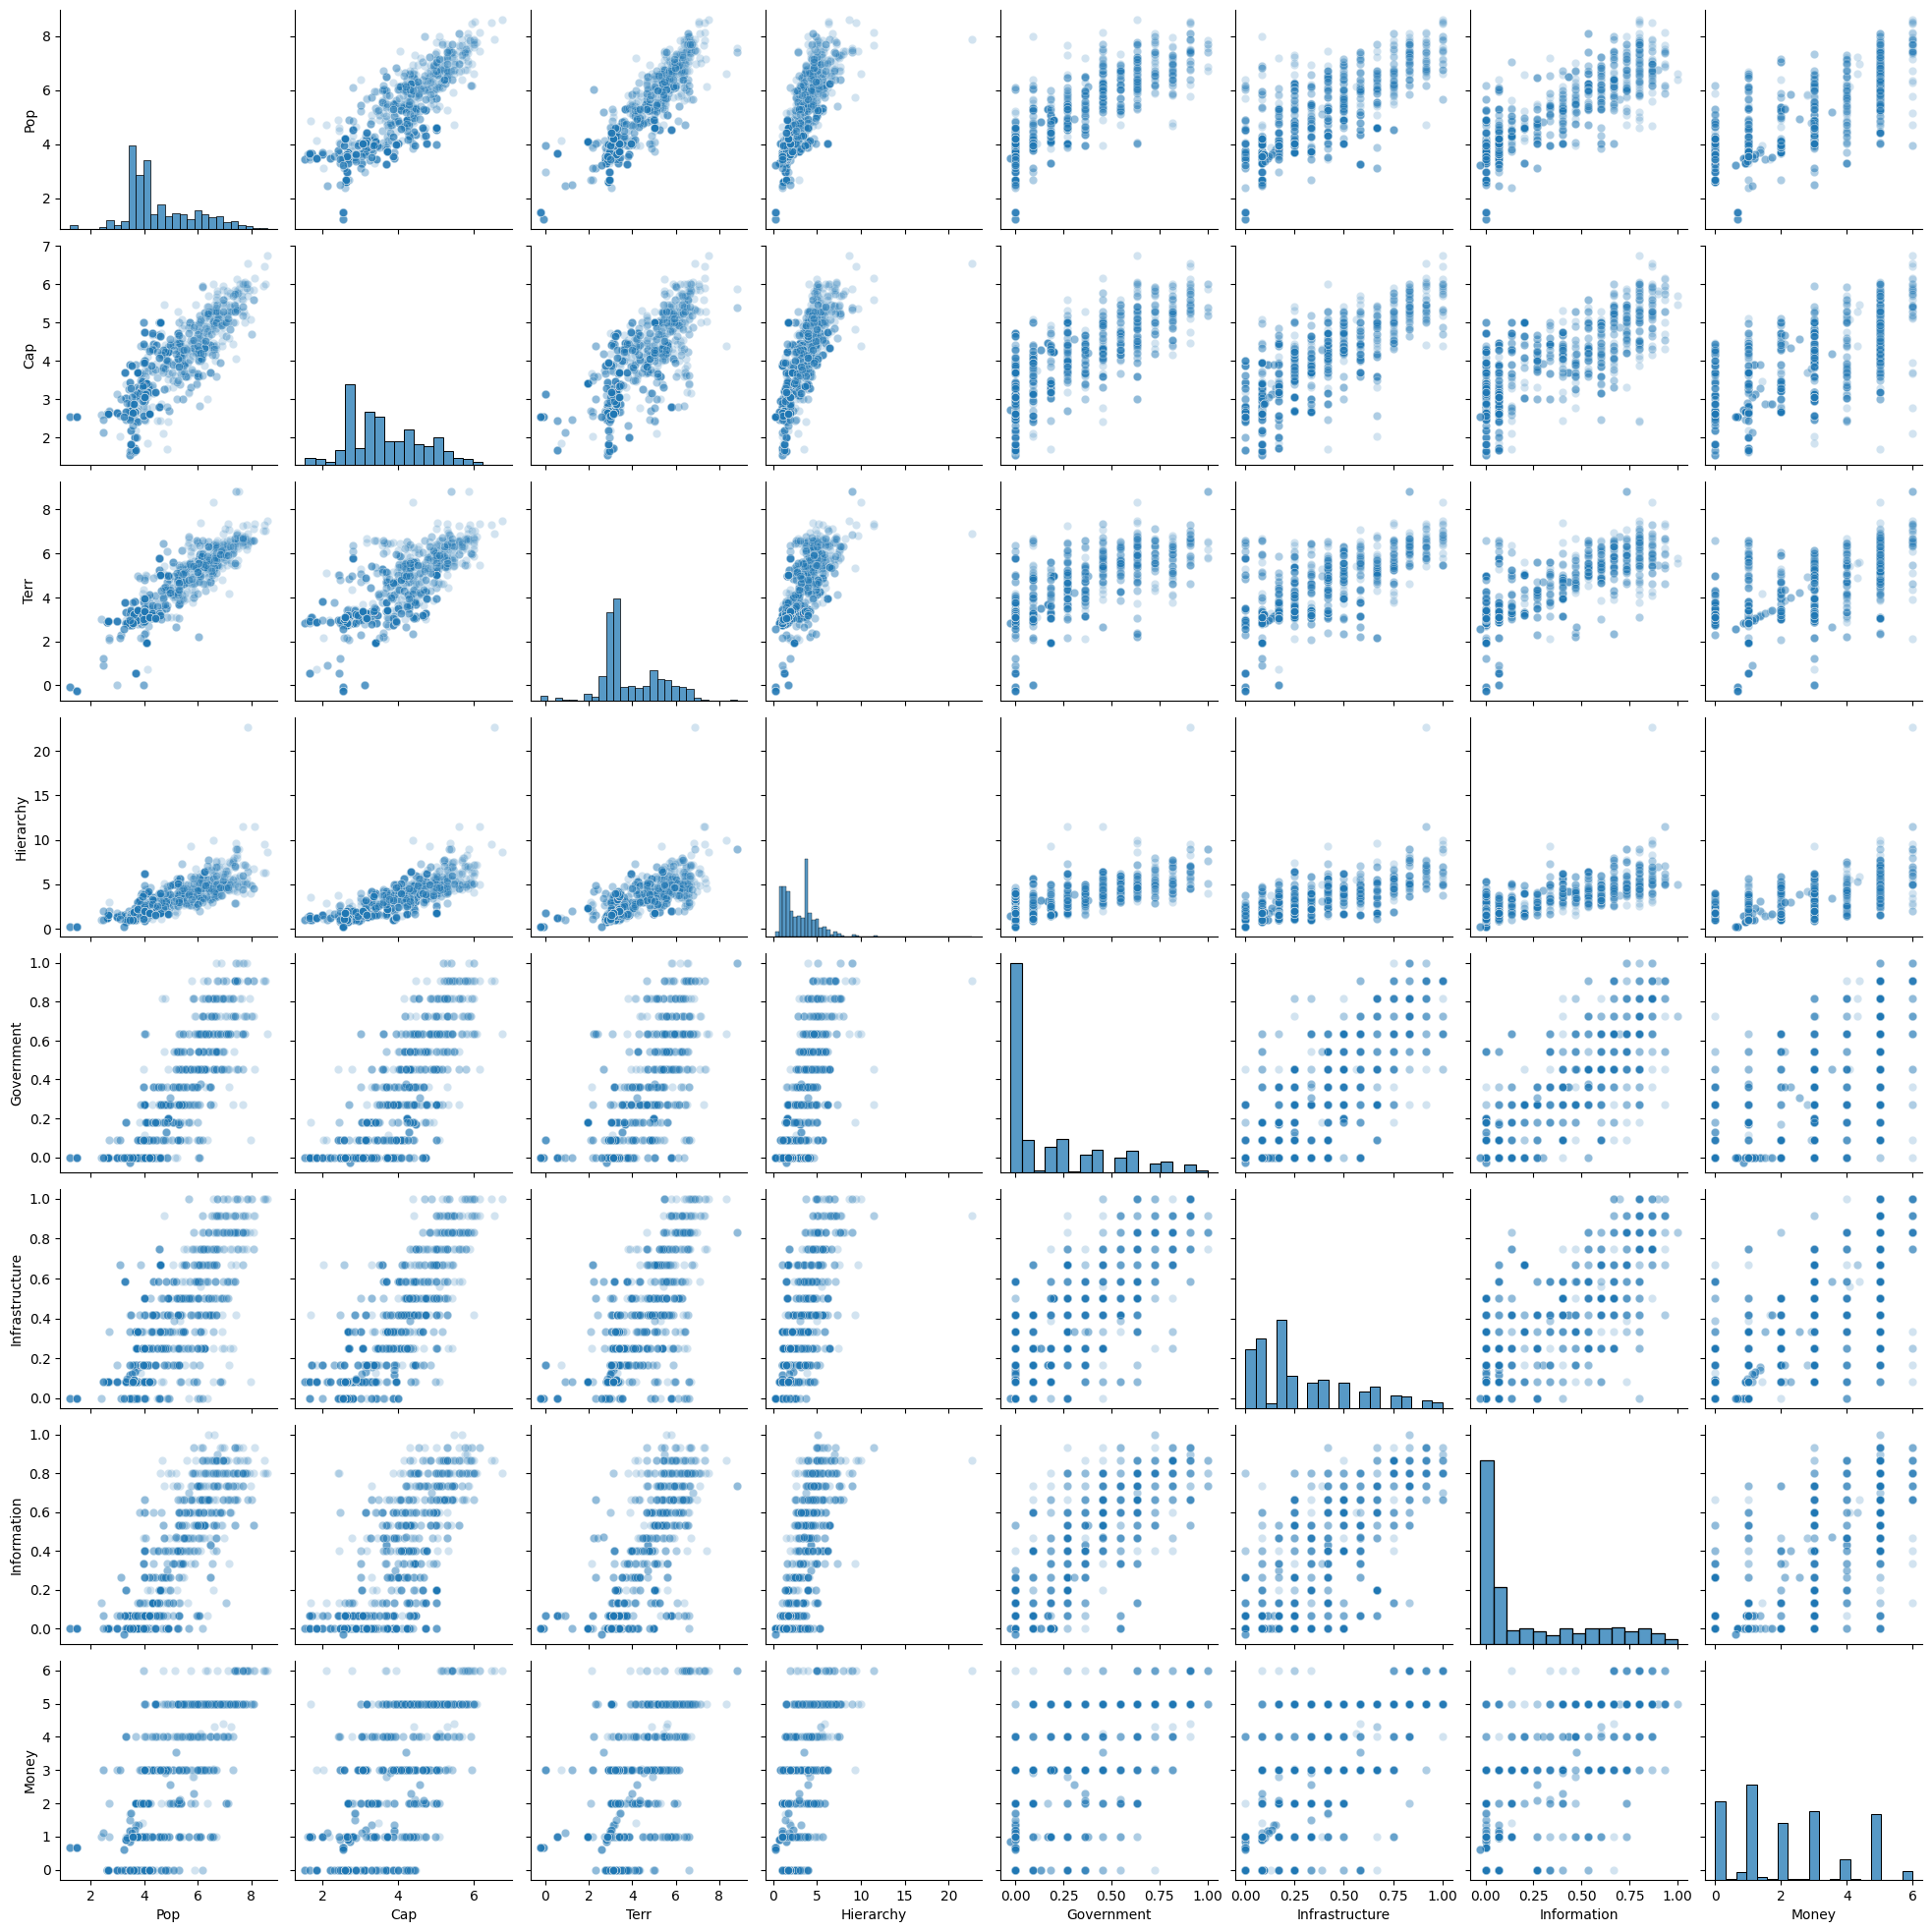

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
sns.pairplot(dataset.scv_imputed[sc_columns], plot_kws={'alpha': 0.2})
plt.show()

In [12]:
import pandas as pd
import pyreadr
data = pyreadr.read_r("/Users/mperuzzo/Documents/PT_analysis/fromJim2/sql_data_13may24_TableDat_5n_100yrs.Rdata")

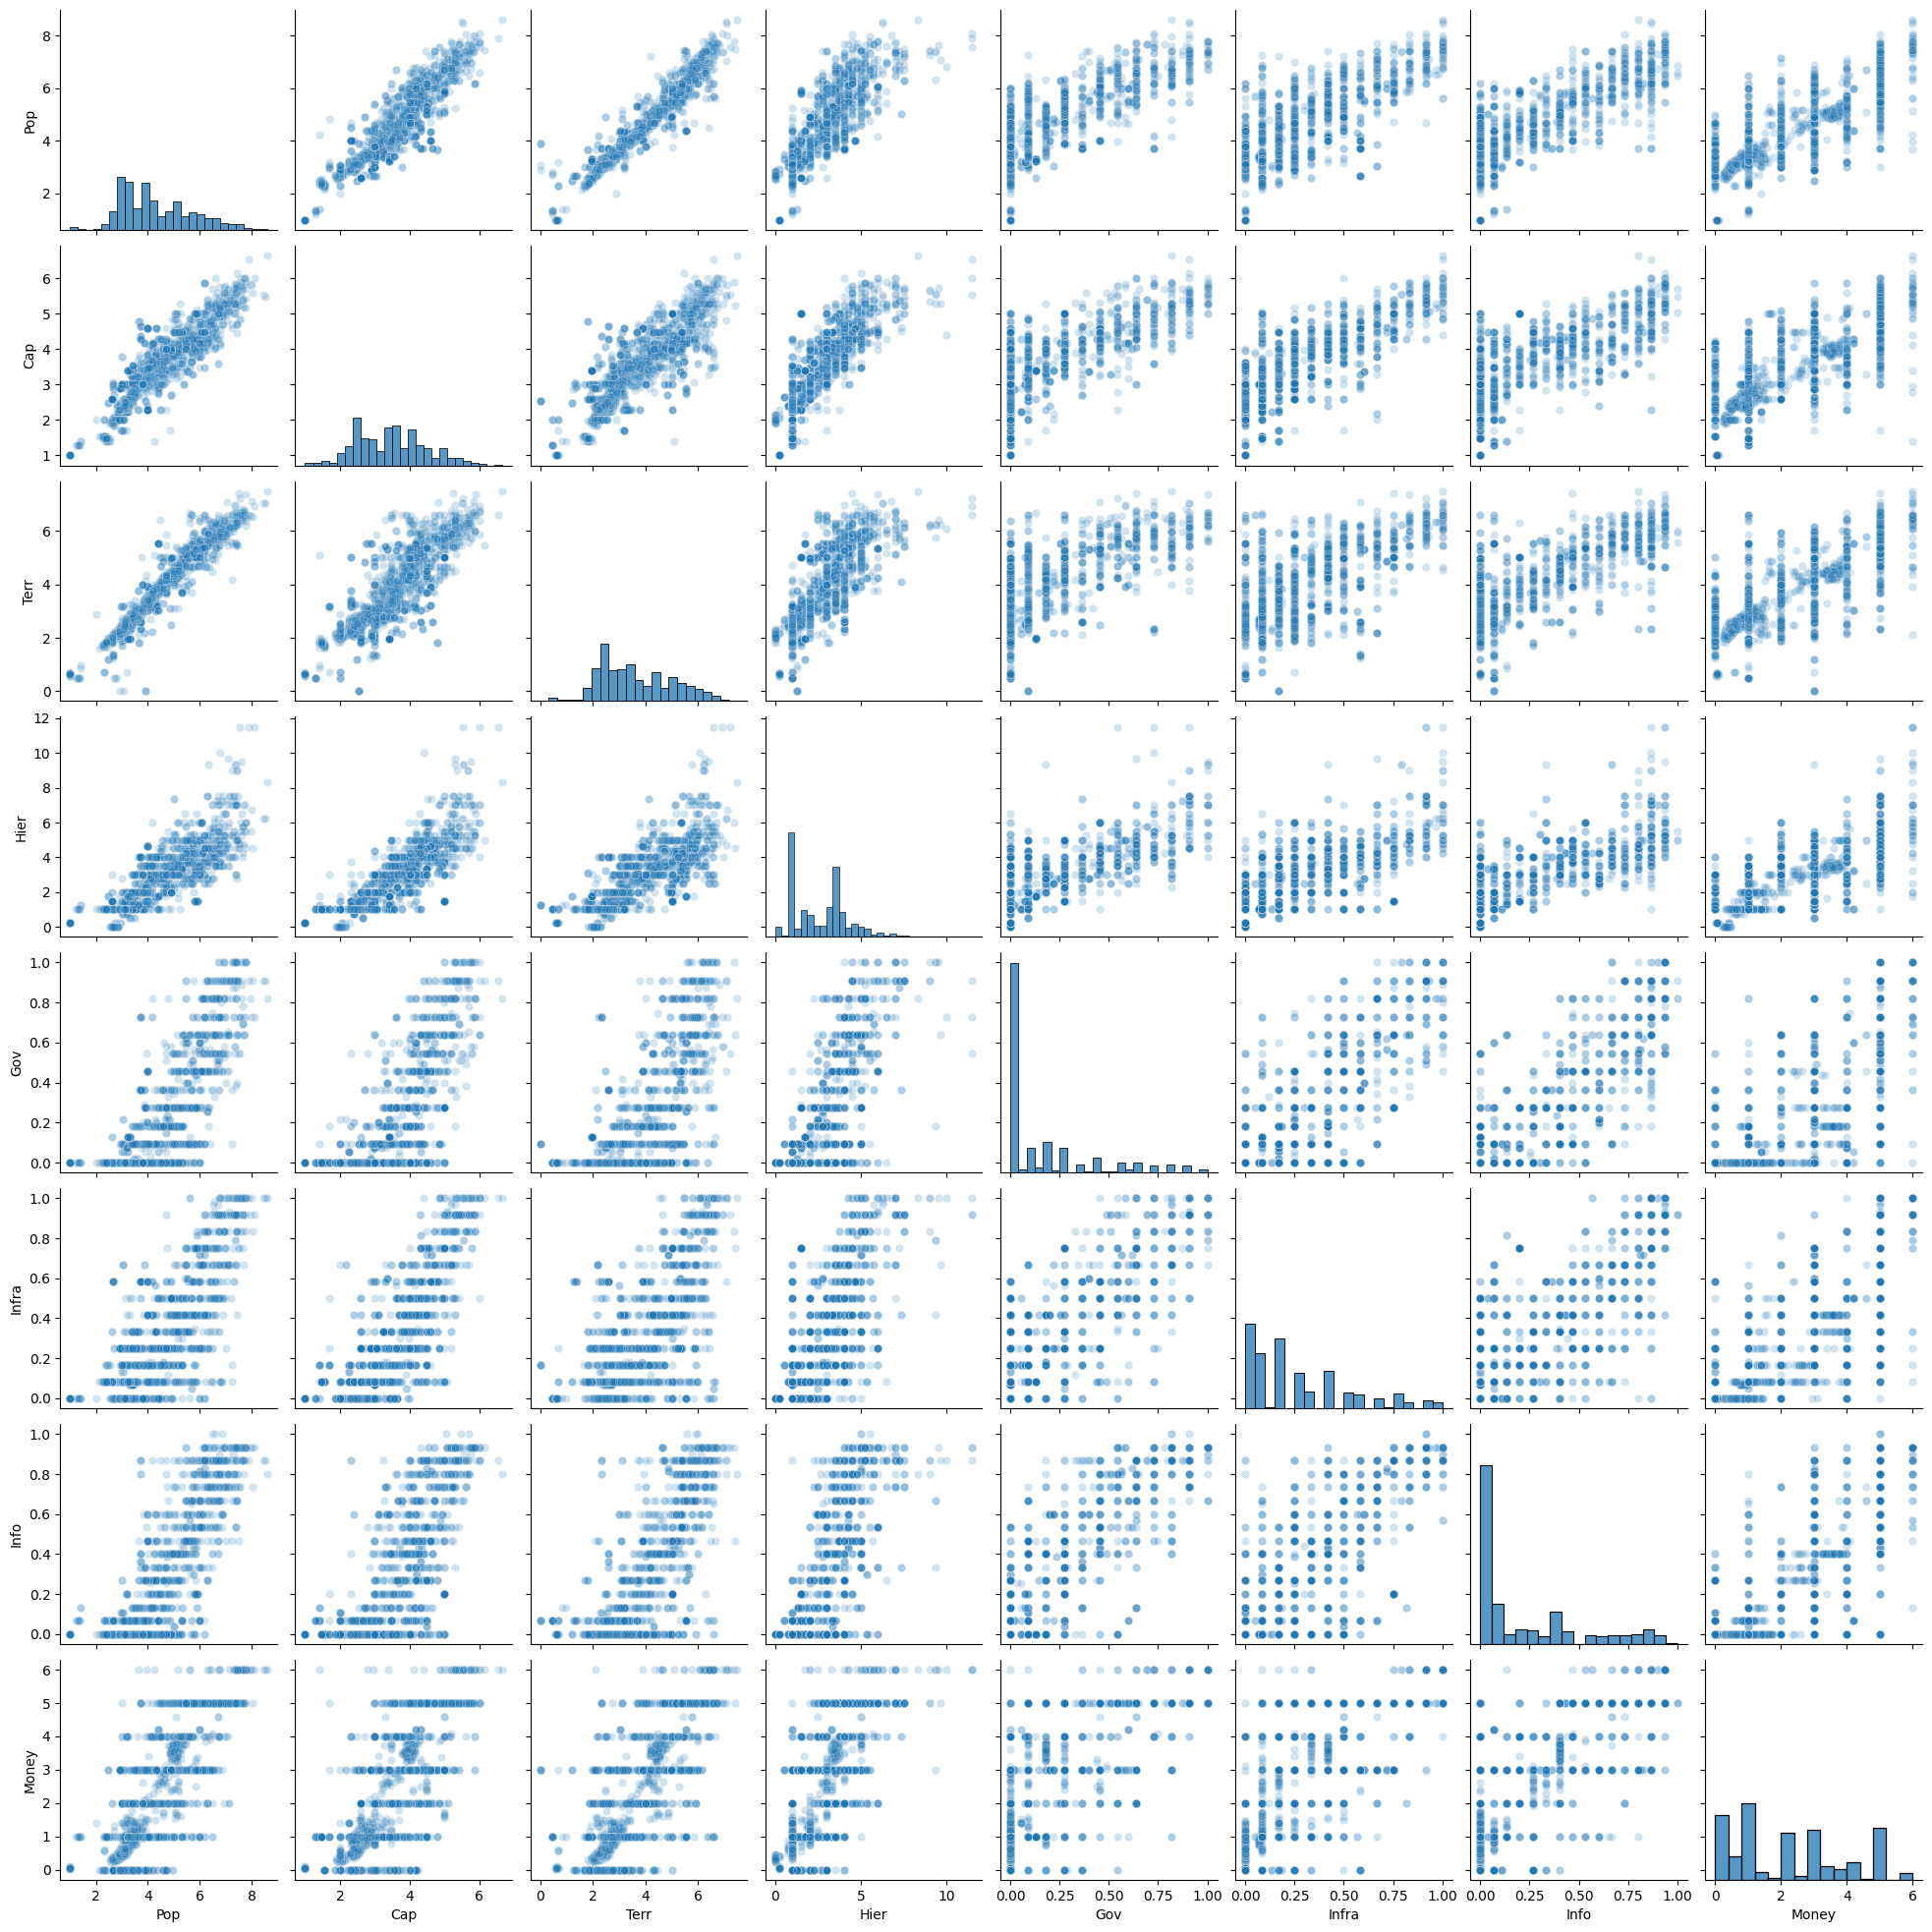

In [13]:

sc_columns = ['Pop','Cap','Terr','Hier', 'Gov', 'Infra', 'Info', 'Money']

sns.pairplot(data["imp.cc.mean"][sc_columns], plot_kws={'alpha': 0.2})
plt.show()

In [14]:
df_old = data["imp.cc.mean"]
df_old_raw = data["datawide.mean"]
row = df_old_raw.loc[df_old_raw.PolityID == 'us_united_states_of_america_reconstruction']
for el in row:
    print(el, row[el].values[0])

NGA NGA_us_united_states_of_america_reconstruction
PolID.OldSystem us_united_states_of_america_reconstruction
PolityID us_united_states_of_america_reconstruction
NGA.Time 1900.0
Dupl n
Administrative.levels 11.0
Articles 0.0
Atlatl nan
Breastplates nan
Bridges 1.0
Bronze nan
Calendar 1.0
Camels nan
Canals 1.0
Chainmail nan
Complex.fortifications nan
Composite.bow nan
Copper nan
Couriers 1.0
Courts 1.0
Crossbow nan
Daggers nan
Ditch nan
Dogs nan
Donkeys nan
drinking.water.supply.systems 1.0
Earth.ramparts nan
Elephants nan
Examination.system nan
Fiction 1.0
food.storage.sites 1.0
Foreign.coins 0.0
Formal.legal.code 1.0
Fortified.camps nan
Full-time.bureaucrats 1.0
General.postal.service 1.0
Gunpowder.siege.artillery nan
Handheld.firearms nan
Helmets nan
History 1.0
Horses nan
Ideological.reinforcement.of.equality nan
Ideological.thought.equates.elites.and.commoners nan
Ideological.thought.equates.rulers.and.commoners nan
Ideology.reinforces.prosociality nan
Impeachment nan
Indigenous.co

In [15]:
sc_columns = ['Pop','Cap','Terr','Hier', 'Gov', 'Infra', 'Info', 'Money']
df_old.loc[df_old.PolityID == 'us_united_states_of_america_reconstruction', sc_columns]
data.keys()

odict_keys(['nga.ts', 'datawide.mean', 'raw.cc.mean', 'imp.cc.mean'])